In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/fraud_project/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

## **EDA**

In [7]:
df.shape

(17918, 31)

In [8]:
# Clean column names
df.columns = df.columns.str.strip()

# Ensure target is numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [9]:
# Droping rows with NaN in target or features we will use
df = df.dropna(subset=['Class', 'Time', 'Amount'])

# Converting target to integer
df['Class'] = df['Class'].astype(int)

In [10]:
# Verify cleaning
print(df.isnull().sum())
print(df['Class'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    17836
1       81
Name: count, dtype: int64


In [11]:
features = ['Time', 'Amount']
X = df[features]
Y = df['Class']

**distribution of legit transactions & fraudulent transactions**

In [12]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    17836
1       81
Name: count, dtype: int64


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

## **Visualization**

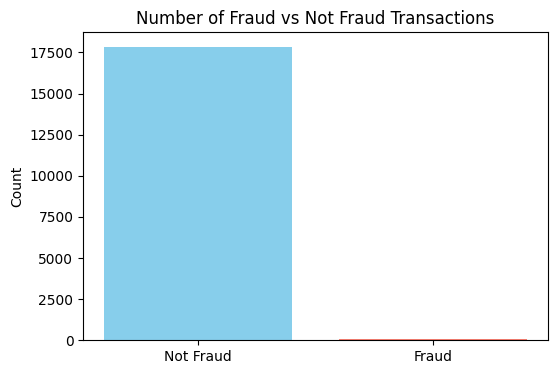

In [13]:
# Using matplotlib
plt.figure(figsize=(6,4))
plt.bar(['Not Fraud', 'Fraud'], class_counts.sort_index(), color=['skyblue', 'salmon'])
plt.title('Number of Fraud vs Not Fraud Transactions')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3044249533.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


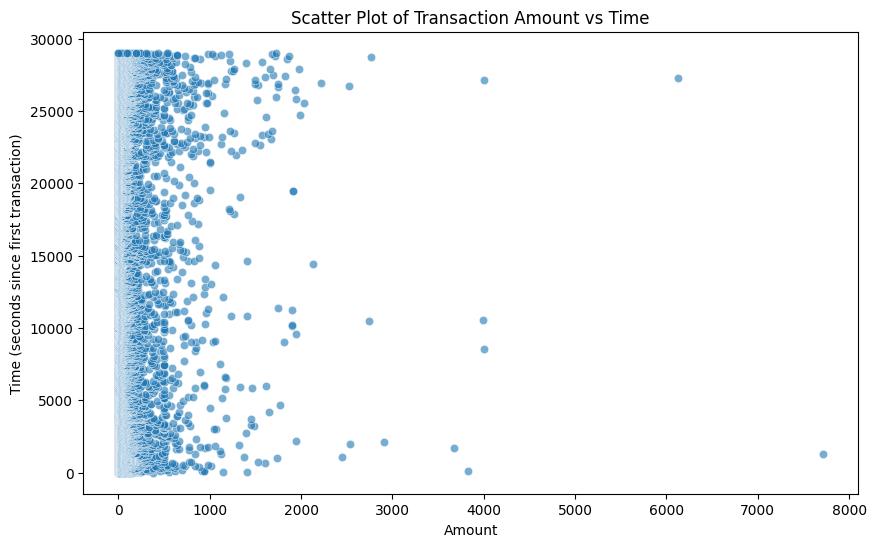

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Amount",
    y="Time",
    palette={0:"blue", 1:"red"},
    alpha=0.6
)
plt.title("Scatter Plot of Transaction Amount vs Time")
plt.xlabel("Amount")
plt.ylabel("Time (seconds since first transaction)")
plt.show()

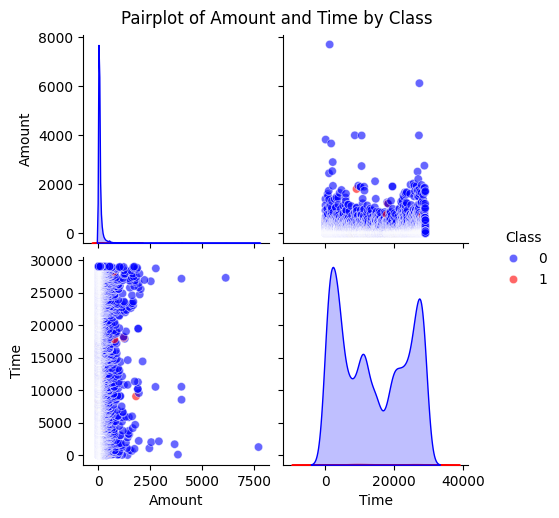

In [15]:
sns.pairplot(
    df,
    vars=["Amount", "Time"],
    hue="Class",
    palette={0:"blue", 1:"red"},
    plot_kws={'alpha':0.6}
)
plt.suptitle("Pairplot of Amount and Time by Class", y=1.02)
plt.show()


**Correlation Heatmap of Credit Card Transactions Features**

<Axes: >

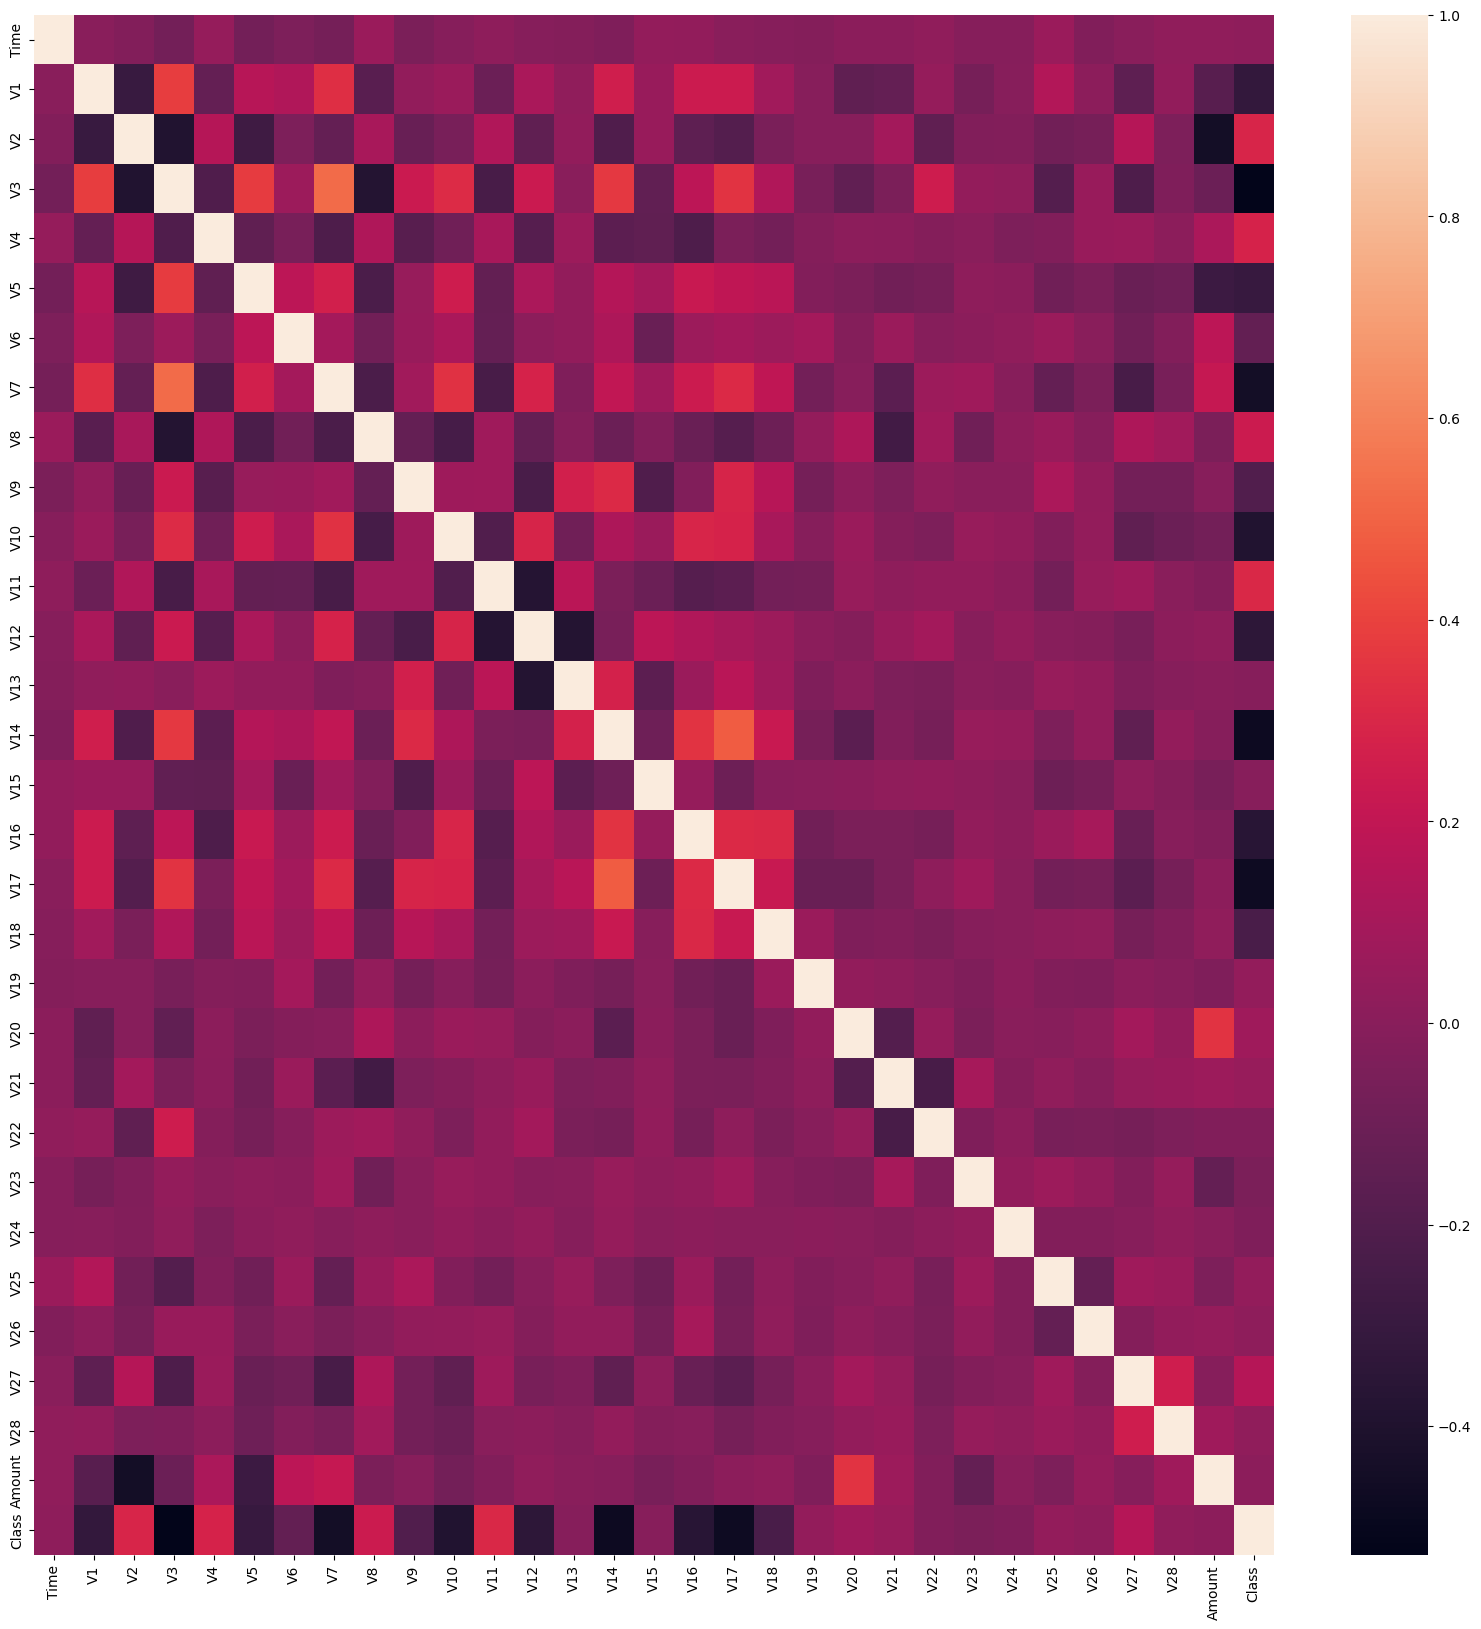

In [16]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

## **Model Train and Testing**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

**Logistics Regression**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Evaluate
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Training accuracy:", accuracy_score(Y_train, train_pred))
print("Test accuracy:", accuracy_score(Y_test, test_pred))
print("Confusion matrix on test set:\n", confusion_matrix(Y_test, test_pred))
print(classification_report(Y_test, test_pred))

Training accuracy: 0.995465010814205
Test accuracy: 0.9955357142857143
Confusion matrix on test set:
 [[3568    0]
 [  16    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3568
           1       0.00      0.00      0.00        16

    accuracy                           1.00      3584
   macro avg       0.50      0.50      0.50      3584
weighted avg       0.99      1.00      0.99      3584



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving the model


In [20]:
pickle.dump(model, open('/content/drive/MyDrive/fraud_project/model.sav', 'wb'))


Model Accuracy check

In [21]:
#training accuracy
train_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", training_accuracy)

# Test predictions
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.995465010814205
Test Accuracy: 0.9955357142857143


**GUI making & launch**

I've written two codes, one with a dropdown option of transaction type which is only there to make the interface look pretty. The other is without this function.

In [22]:
import gradio as gr

#loading model
model = pickle.load(open('/content/drive/MyDrive/fraud_project/model.sav', 'rb'))

#defining prediction function
def predict_transaction(time, amount):
    x = np.array([[time, amount]], dtype=float)
    pred = model.predict(x)[0]
    return "Fraud" if pred == 1 else "Not Fraud"

#defining GUI inputs
inputs = [
    gr.Number(label="Time (seconds since first transaction)"),
    gr.Number(label="Amount")
]

#launch GUI
gui = gr.Interface(
    fn=predict_transaction,
    inputs=inputs,
    outputs="text",
    title="Credit Card Fraud Prediction"
)

gui.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://195d19b21b2bbd5cff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [23]:
import gradio as gr

#Loading model
model = pickle.load(open('/content/drive/MyDrive/fraud_project/model.sav', 'rb'))

# Prediction function
def predict_transaction(time, amount, transaction_type):
    # transaction_type is not used in the model yet
    x = np.array([[time, amount]], dtype=float)
    pred = model.predict(x)[0]

    if pred == 1:
        # Fraud case
        return """
        <span style='color:red; font-weight:bold; font-size:26px;'>⚠️ This transaction looks suspicious</span><br><br>
        <span style='font-size:20px;'>
        It seems this transaction may be fraudulent. Please review it carefully and follow these steps.<br><br>
        <b>Steps to take:</b><br>
        <b>1.</b> Call your bank immediately using the helpline on the back of your card or from the bank’s official website. Explain that you did not make this transaction and ask them to block or freeze your card.<br>
        <b>2.</b> Check recent transactions in your account statement or mobile app and note any other payments you do not recognize.<br>
        <b>3.</b> Follow your bank’s fraud/dispute process and ask for a new card to be issued. The bank will usually investigate and may reverse unauthorized charges if confirmed as fraud.<br>
        <b>4.</b> If your bank is not resolving the issue, you can file a formal complaint through the State Bank of Pakistan’s complaint mechanism:<br>
        <a href='https://www.sbp.org.pk/cpd/cpd-com.asp' target='_blank'>SBP “Complaint Handling Mechanism at Banks”</a><br><br>
        <i>Tip:</i> Stay calm and act quickly. Banks deal with such cases regularly, and fast reporting greatly improves your chances of getting your money back.
        </span>
        """
    else:
        # Non-fraud case
        return """
        <span style='color:green; font-weight:bold; font-size:26px;'> This transaction is not a fraud</span><br><br>
        <span style='font-size:20px;'>
        This transaction does not appear to be fraudulent and matches your usual activity.<br>
        You can continue using your card as normal, but it is still a good idea to review your recent transactions regularly.<br><br>
        If you ever see a payment you do not recognize, contact your bank’s helpline right away to double‑check.
        </span>
        """

# Using Gradio Blocks for layout
with gr.Blocks() as gui:
    gr.Markdown(
        """
        # 💳 Credit Card Fraud Prediction
        Enter transaction details to check if it's fraudulent.
        """
    )

    with gr.Row():
        time_input = gr.Number(label="Time (seconds since first transaction)", value=0)
        amount_input = gr.Number(label="Amount", value=0)
        transaction_input = gr.Dropdown(
            choices=["PAYMENT", "TRANSFER", "CASH OUT", "DEBIT", "CASH IN"],
            label="Transaction Type"
        )

    predict_btn = gr.Button("Predict", variant="primary")
    output = gr.HTML(label="Prediction Result")

    predict_btn.click(
        fn=predict_transaction,
        inputs=[time_input, amount_input, transaction_input],
        outputs=output
    )

gui.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e58af5024a57e4450.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
